10) Data Visualization III
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a boxplot for each feature in the dataset.
4. Compare distributions and identify outliers.

In [1]:
import seaborn as sns
import numpy as np

df = sns.load_dataset('iris')

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
column = len(list(df))
print("Total Features of Iris Dataset: ",column)

Total Features of Iris Dataset:  5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Display unique values of species feature
np.unique(df["species"])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='petal_width', ylabel='Count'>

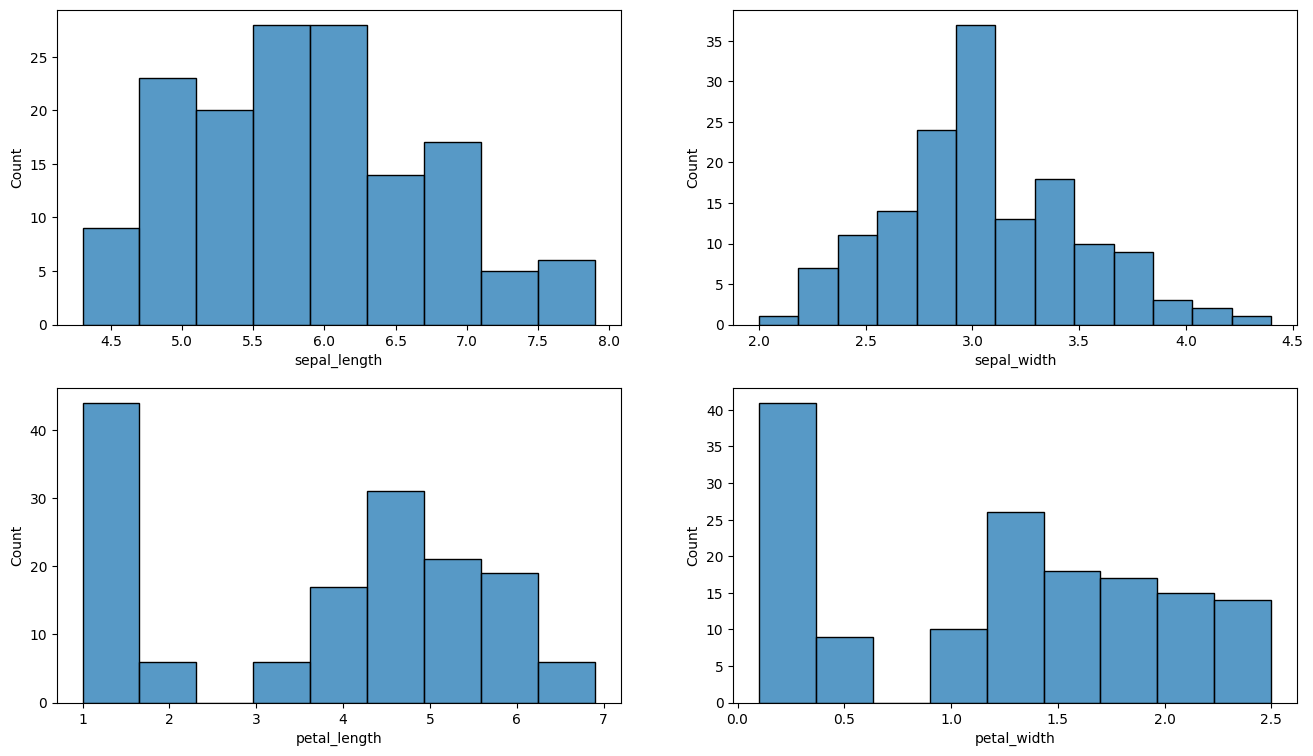

In [7]:
import matplotlib.pyplot as mpl

fig,axes = mpl.subplots(2,2,figsize=(16,9))
sns.histplot(df['sepal_length'],ax = axes[0,0])
sns.histplot(df['sepal_width'],ax = axes[0,1])
sns.histplot(df['petal_length'],ax = axes[1,0])
sns.histplot(df['petal_width'],ax = axes[1,1])

<Axes: ylabel='petal_width'>

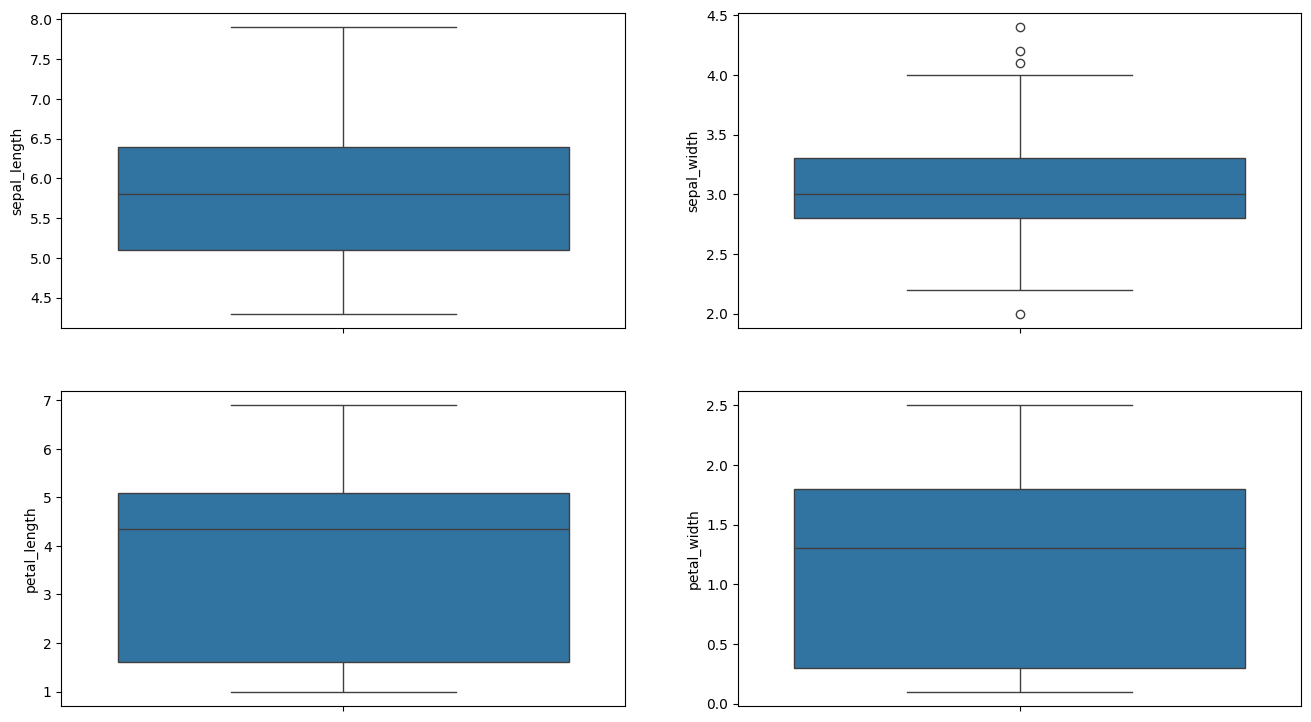

In [8]:
fig,axes = mpl.subplots(2,2,figsize=(16,9))
sns.boxplot(df['sepal_length'],ax = axes[0,0])
sns.boxplot(df['sepal_width'],ax = axes[0,1])
sns.boxplot(df['petal_length'],ax = axes[1,0])
sns.boxplot(df['petal_width'],ax = axes[1,1])

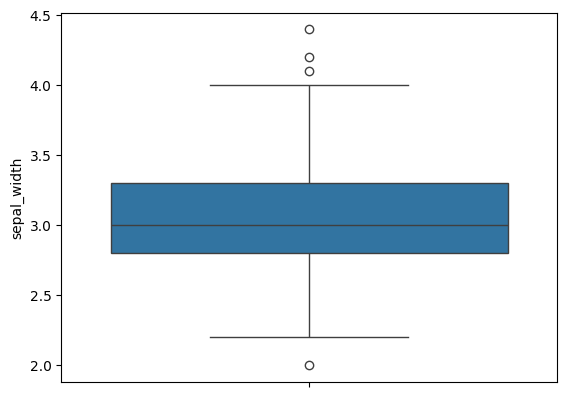

In [9]:
# Outliers detect in Sepal_width Species
old_df =sns.boxplot(df['sepal_width'])

In [10]:
# Finding the IQR
percentile25 = df['sepal_width'].quantile(0.25)
percentile75 = df['sepal_width'].quantile(0.75)
iqr= percentile75-percentile25

In [11]:
# Finding upper and lower limit

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [12]:
# Finding Outliers

print(np.where(df['sepal_width'] > upper_limit))
print(np.where(df['sepal_width'] < lower_limit))

(array([15, 32, 33]),)
(array([60]),)


In [13]:
#Remove outlair by drop function
df.drop([15,32,33,60],inplace=True)

<Axes: ylabel='sepal_width'>

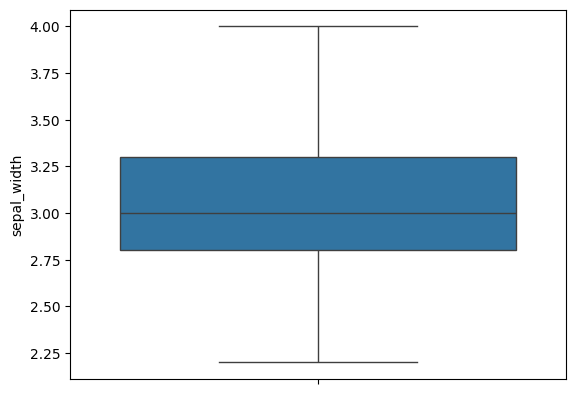

In [14]:
# After removing outliers.
sns.boxplot(df['sepal_width'])